#### ML Modeling

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from utils.plt_setting import plt_settings
from utils.evaluation import regression_evaluation, f_importances, plot_actual_pred
from utils.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('2a-all-scaled-X1')
df_y = read_data('2a-all-y1')

In [3]:
training_columns = df_X.columns

X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.2)
    
X_test_copy = X_test.copy()

In [4]:
SEED = 123
ml_models = {
    'LIN': LinearRegression(),
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [5]:
def diff_ytest_pred(model_key, test, pred):
    test = test['total_cons_cost'].values.tolist()
    pred = pred.tolist()
    if isinstance(pred[0], list):
        pred = [item for sub in pred for item in sub]
    max_test = max(test)
    loop_size = len(test)
    result_mape = []
    result_max_mape = []
    for idx in range(loop_size):
        new_mape = abs((test[idx] - pred[idx])/test[idx])*100
        new_max_mape = abs((test[idx] - pred[idx])/(test[idx]+max_test))*100
        result_mape.append(new_mape)
        result_max_mape.append(new_max_mape)
    X_test_copy[f'{model_key}_mape'] = result_mape
    X_test_copy[f'{model_key}_max_mape'] = result_max_mape

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    diff_ytest_pred(model_key, y_test, predictions)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LIN
R2_SCORE: -4851980261468878978154496.000000, MAPE: 4462404505776.761719, MSE: 21093775584957867898040702065006608384.000000, RMSE: 4592796053055030784.000000, MAE: 172816664562913248.000000
`LIN` object has no attribute `feature_importances_`


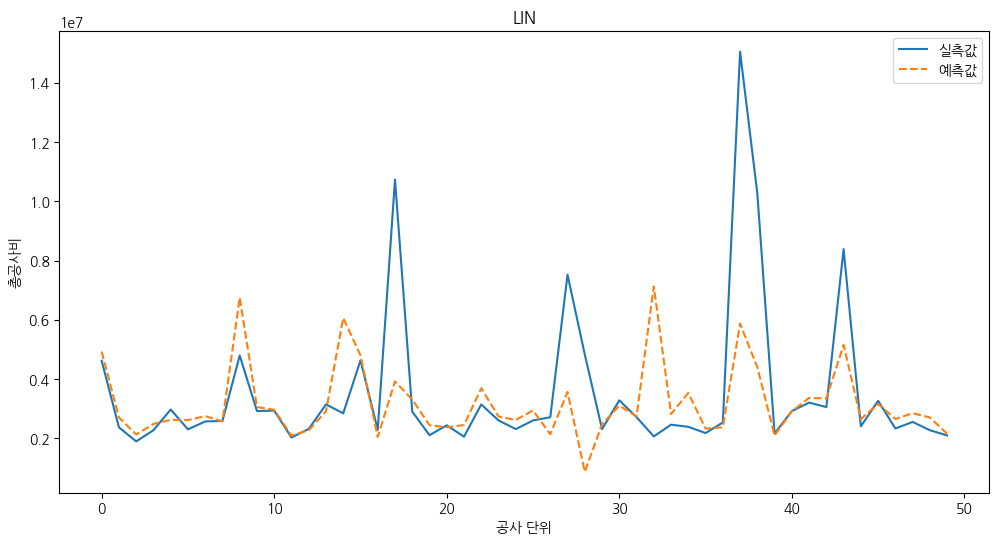

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.026e+15, tolerance: 2.663e+12
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.354835, MAPE: 19.493484, MSE: 2804825893986.866211, RMSE: 1674761.443904, MAE: 749435.409601
`LASSO` object has no attribute `feature_importances_`


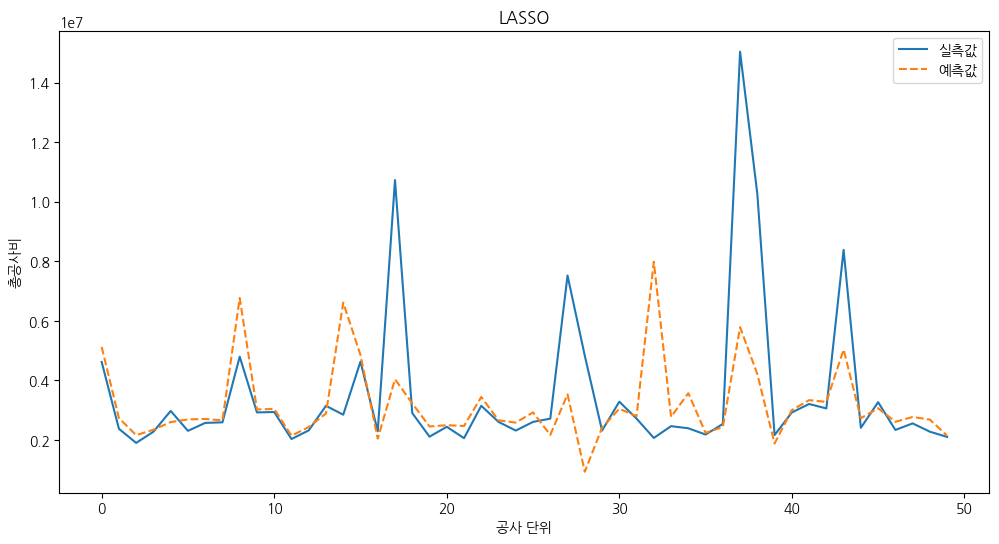

Evaluation: RIDGE
R2_SCORE: 0.354098, MAPE: 19.576682, MSE: 2808031458541.128906, RMSE: 1675718.191863, MAE: 751584.725483
`RIDGE` object has no attribute `feature_importances_`


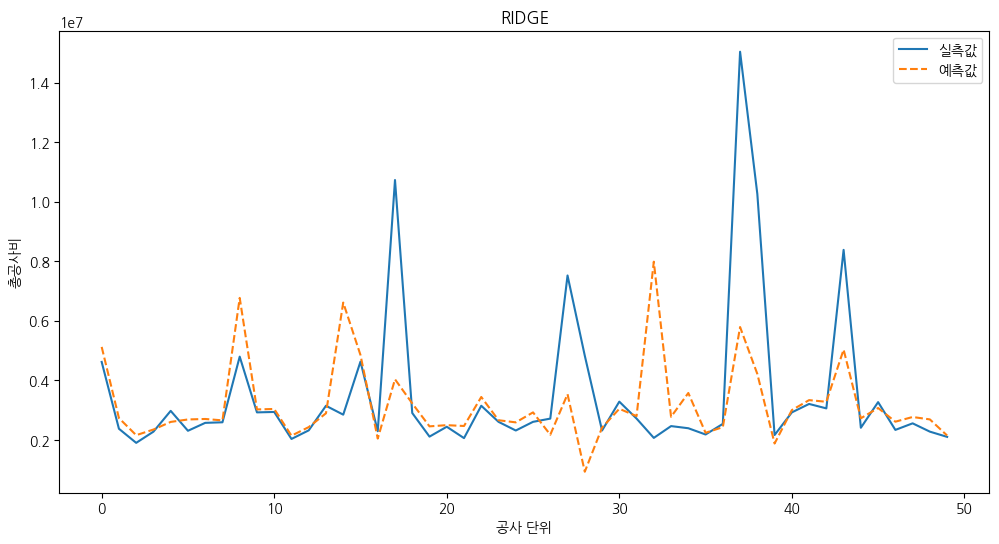

Evaluation: KNR
R2_SCORE: 0.247927, MAPE: 20.965022, MSE: 3269604560690.371582, RMSE: 1808204.789478, MAE: 817589.891921
`KNR` object has no attribute `feature_importances_`


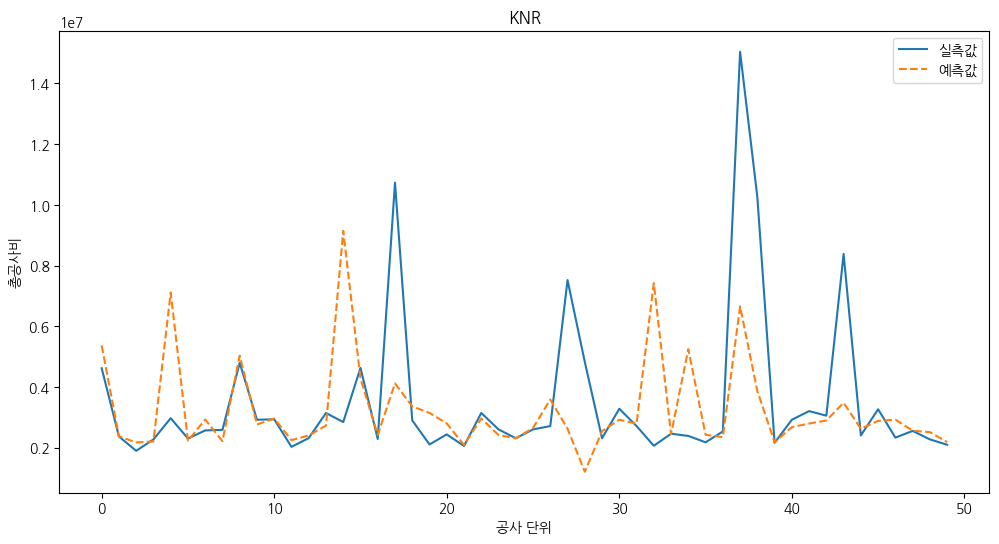

Evaluation: DTR
R2_SCORE: -0.442216, MAPE: 25.291615, MSE: 6269970296718.383789, RMSE: 2503990.873929, MAE: 979645.608282


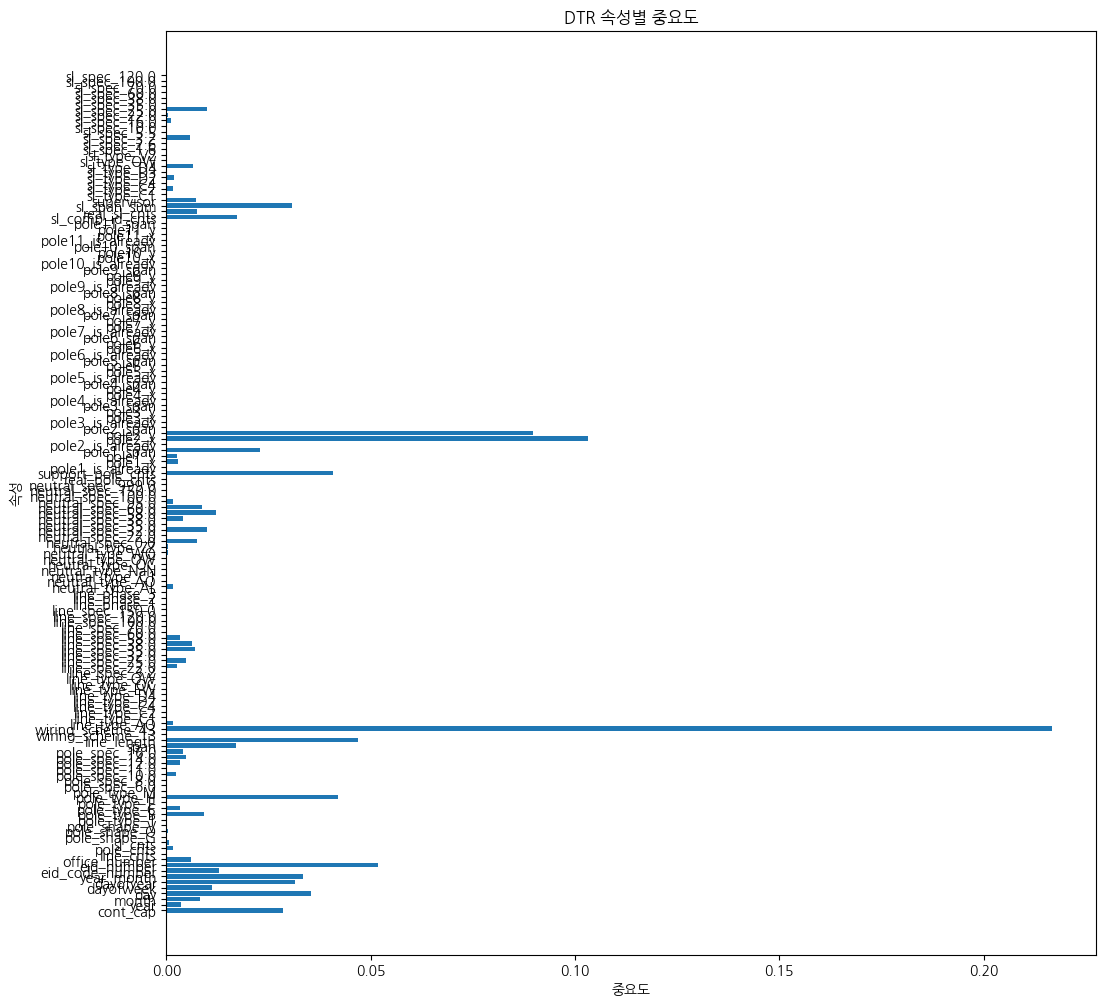

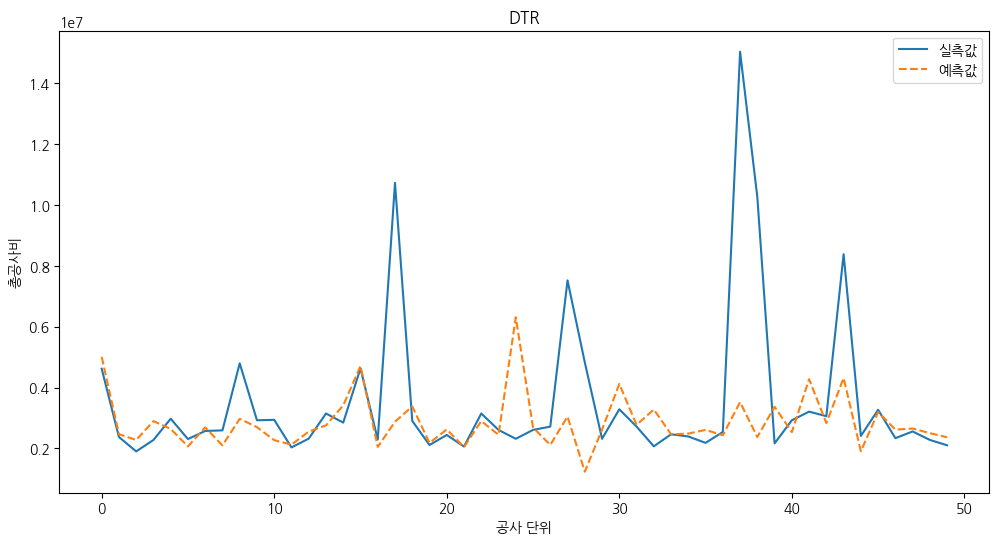

/tmp/ipykernel_6911/3261526636.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Evaluation: RFR
R2_SCORE: 0.322518, MAPE: 19.728219, MSE: 2945323430211.223145, RMSE: 1716194.461654, MAE: 774424.676368


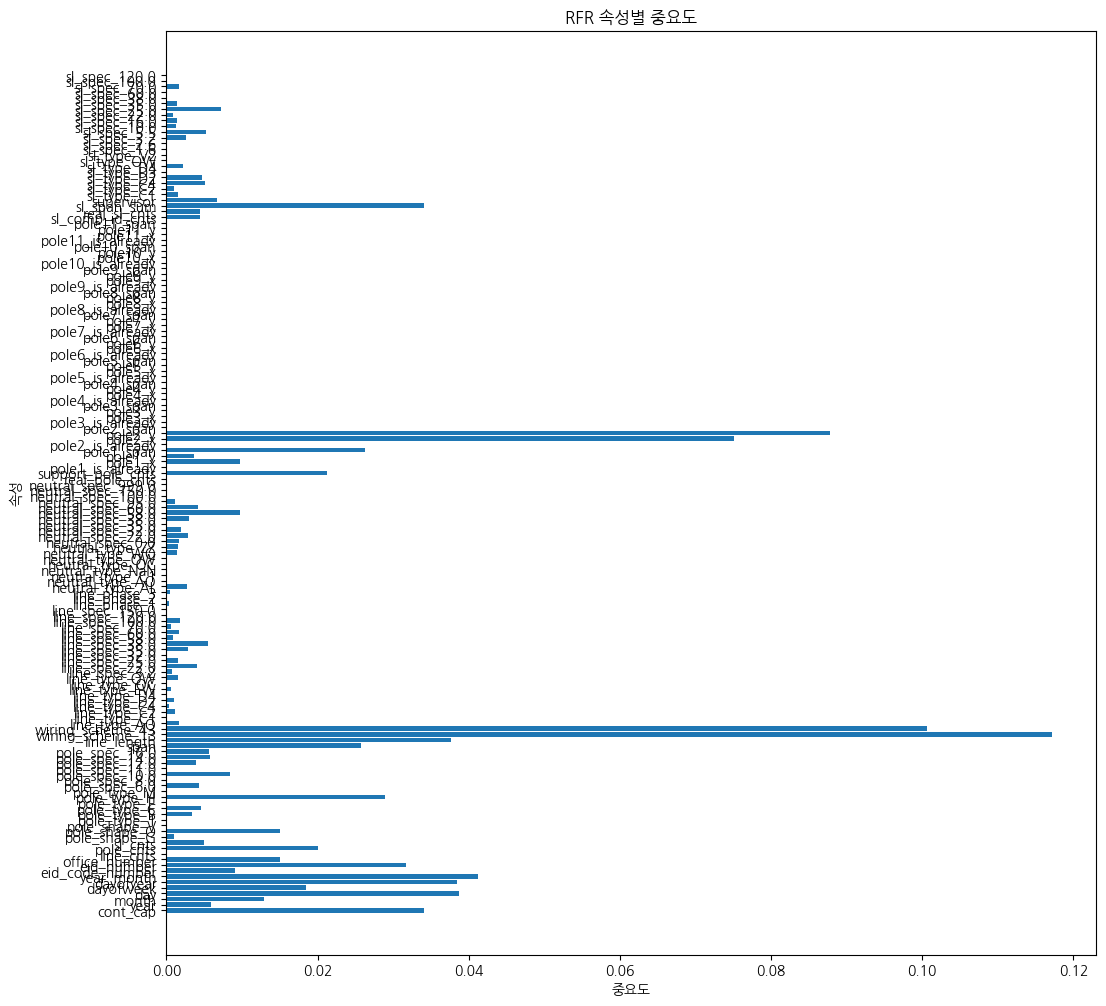

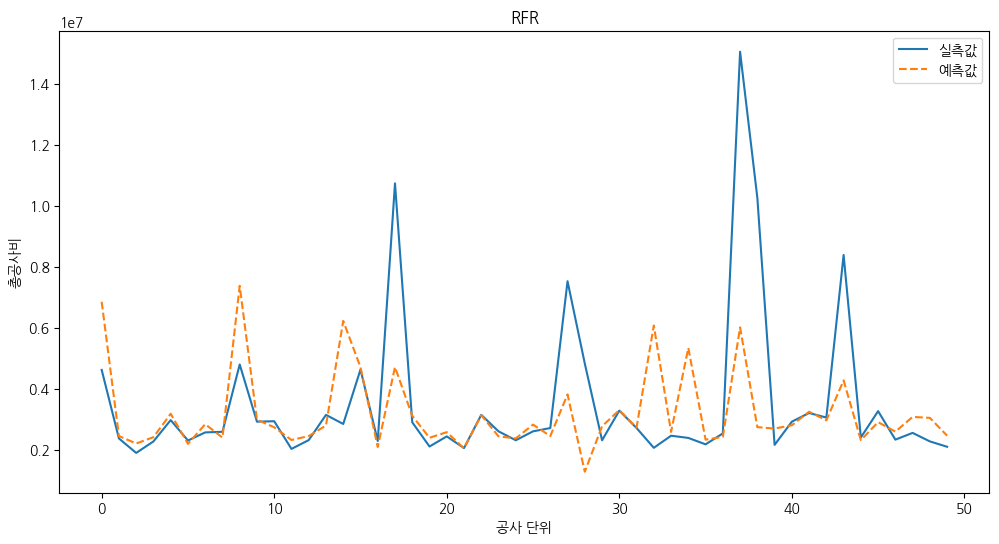

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.356832, MAPE: 19.410914, MSE: 2796146161927.097656, RMSE: 1672168.102174, MAE: 755899.359836


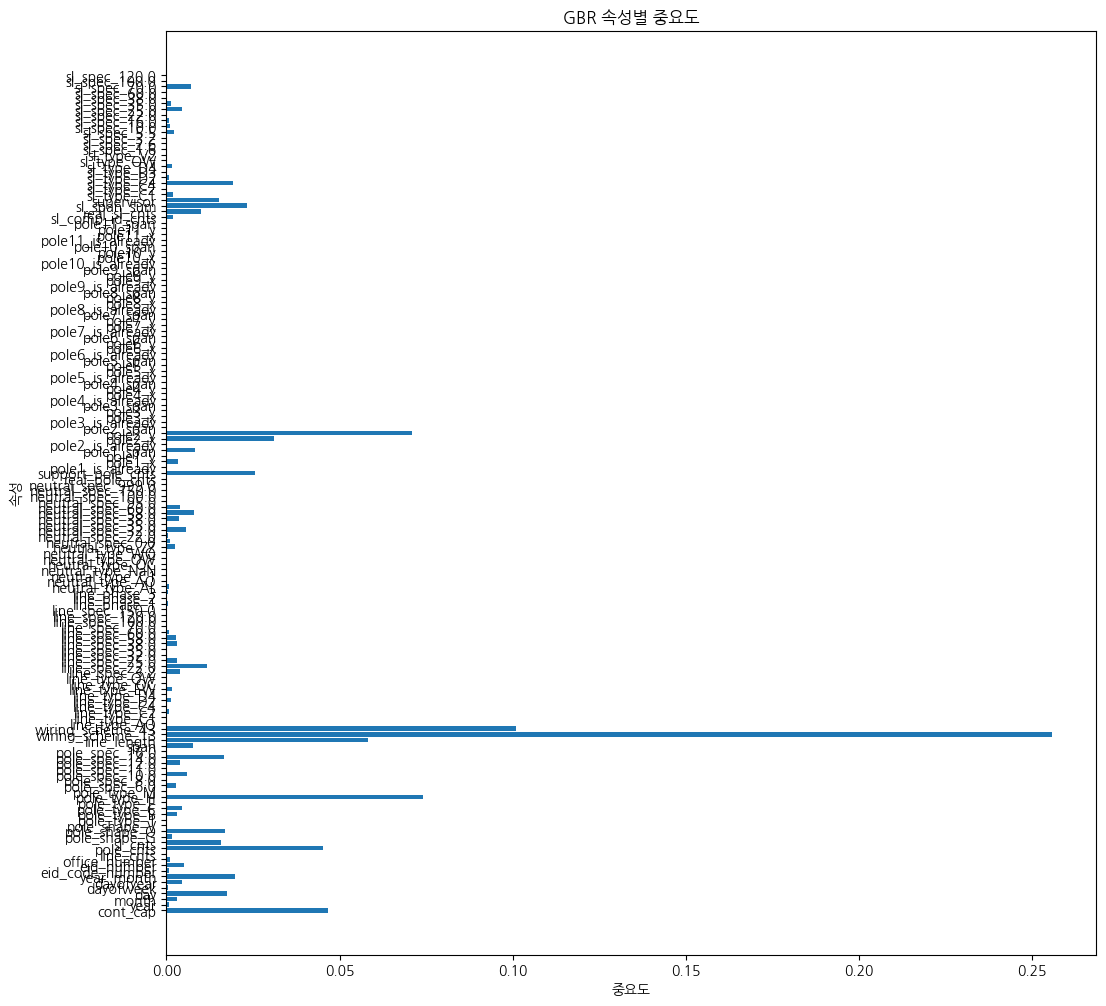

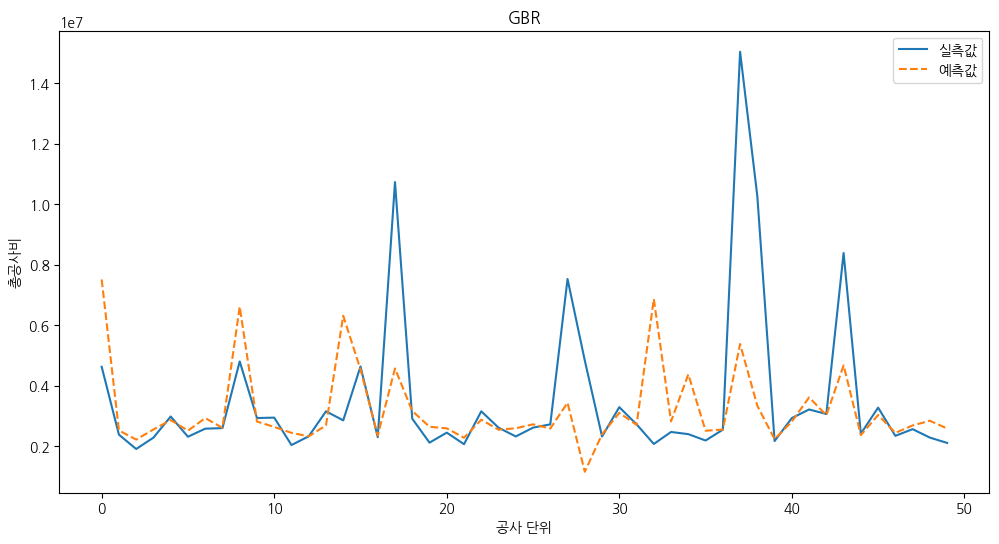

Evaluation: EN
R2_SCORE: 0.381387, MAPE: 19.338423, MSE: 2689393728145.725098, RMSE: 1639937.111034, MAE: 743824.595959
`EN` object has no attribute `feature_importances_`


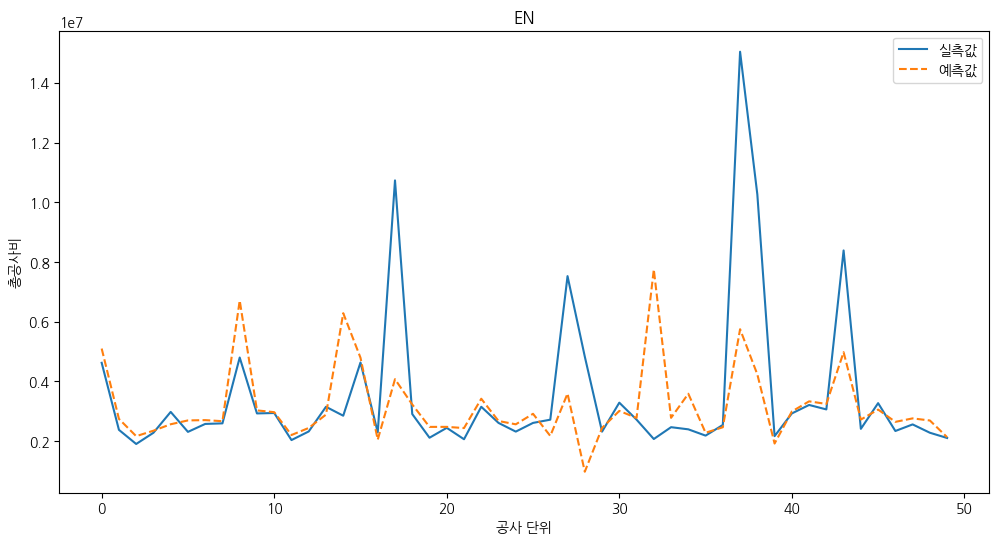

Evaluation: XGR
R2_SCORE: -0.106686, MAPE: 34.010193, MSE: 4811270224442.377930, RMSE: 2193460.787077, MAE: 1237397.380558


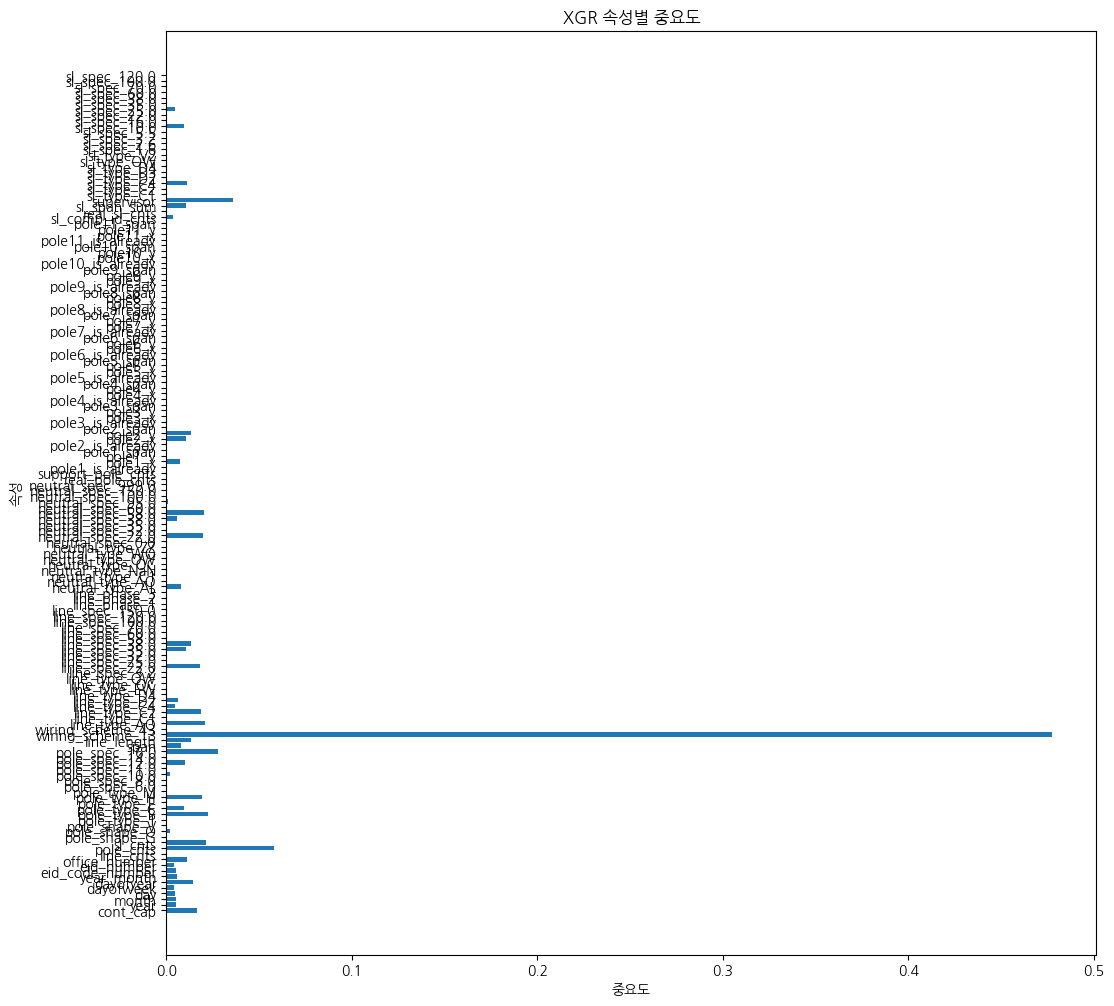

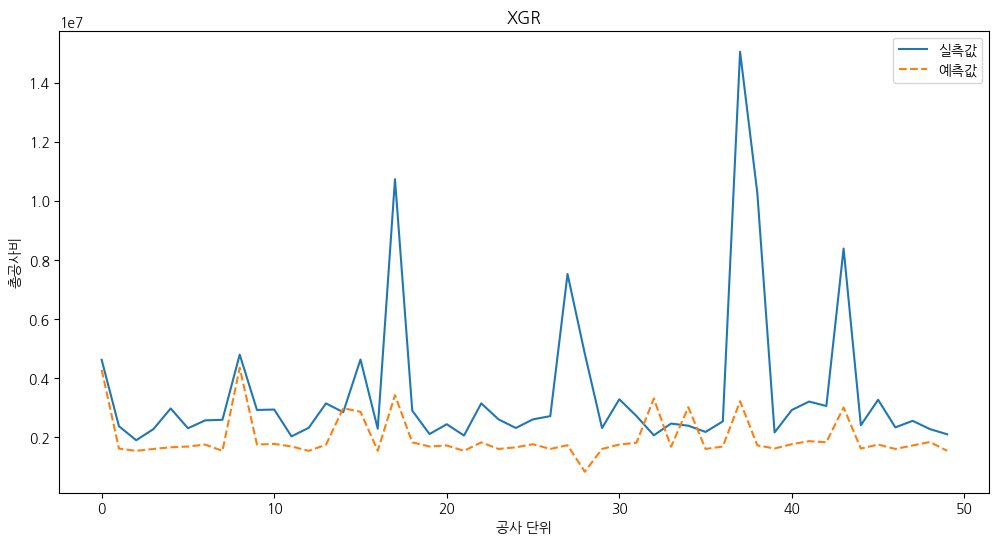

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LIN,-4.851980e+24,4.462405e+10,2.109378e+37,4.592796e+18,1.728167e+17
LASSO,3.548353e-01,1.949348e-01,2.804826e+12,1.674761e+06,7.494354e+05
RIDGE,3.540979e-01,1.957668e-01,2.808031e+12,1.675718e+06,7.515847e+05
KNR,2.479271e-01,2.096502e-01,3.269605e+12,1.808205e+06,8.175899e+05
DTR,-4.422156e-01,2.529162e-01,6.269970e+12,2.503991e+06,9.796456e+05
RFR,3.225181e-01,1.972822e-01,2.945323e+12,1.716194e+06,7.744247e+05
GBR,3.568318e-01,1.941091e-01,2.796146e+12,1.672168e+06,7.558994e+05
EN,3.813869e-01,1.933842e-01,2.689394e+12,1.639937e+06,7.438246e+05
XGR,-1.066861e-01,3.401019e-01,4.811270e+12,2.193461e+06,1.237397e+06
